In [65]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime

from data_preprocessing import get_events_summary, join_data_v2, reduce_mem_usage, check_nans, check_oil_rate
from renameFeatures import rename_features, get_data_summary
from data_vizualization import curvatire_viz, metrics_plotting, metrics_plotting_with_events

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
PATH = "C:\\Users\\vladv\\predictiveAnalytics\\data\\"

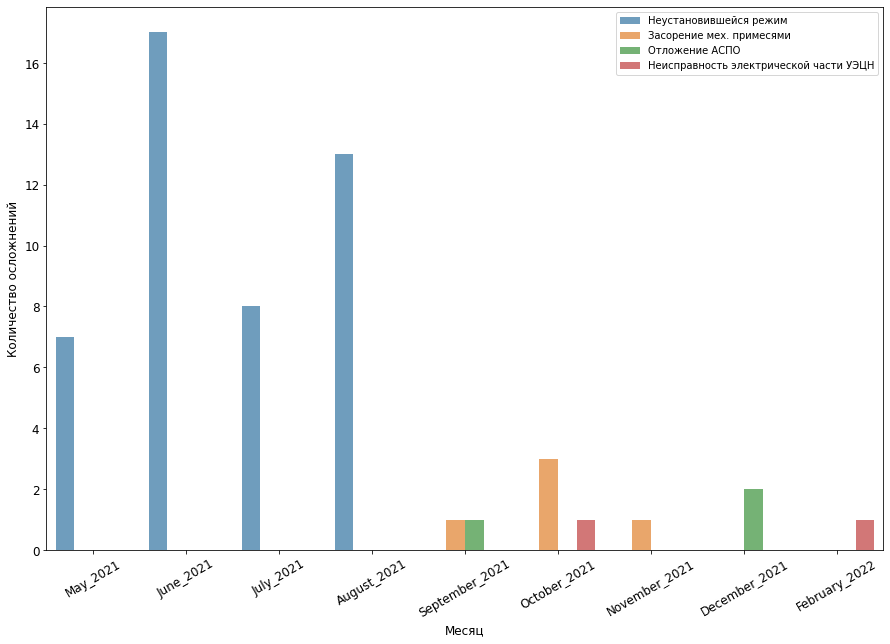

In [67]:
events = get_events_summary(PATH, do_plot=True)

In [68]:
events_by_wells = events.groupby(["well_id", "event"])["event"].count().to_frame().rename(columns={"event": "count"}).reset_index()

In [69]:
# events_by_wells = events_by_wells.sort_values(by="event")

In [70]:
events = events_by_wells["event"].unique()
colors = sns.color_palette("tab10")[:len(events)]
wells = events_by_wells["well_id"].unique()

In [71]:
len(colors), len(events)

(4, 4)

In [72]:
events_amount = events_by_wells["count"].to_numpy()

In [73]:
events_amount[3] += 1

In [74]:
events_amount.sum()

56

In [75]:
events_by_wells["count"] = events_amount

In [76]:
colors_dict = {}

for lbl, clr in zip(events, colors):
    colors_dict[lbl] = clr

C:\Users\vladv\AppData\Local\Temp/ipykernel_24016/3245114234.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, labels=events, loc="upper right", fontsize=30)


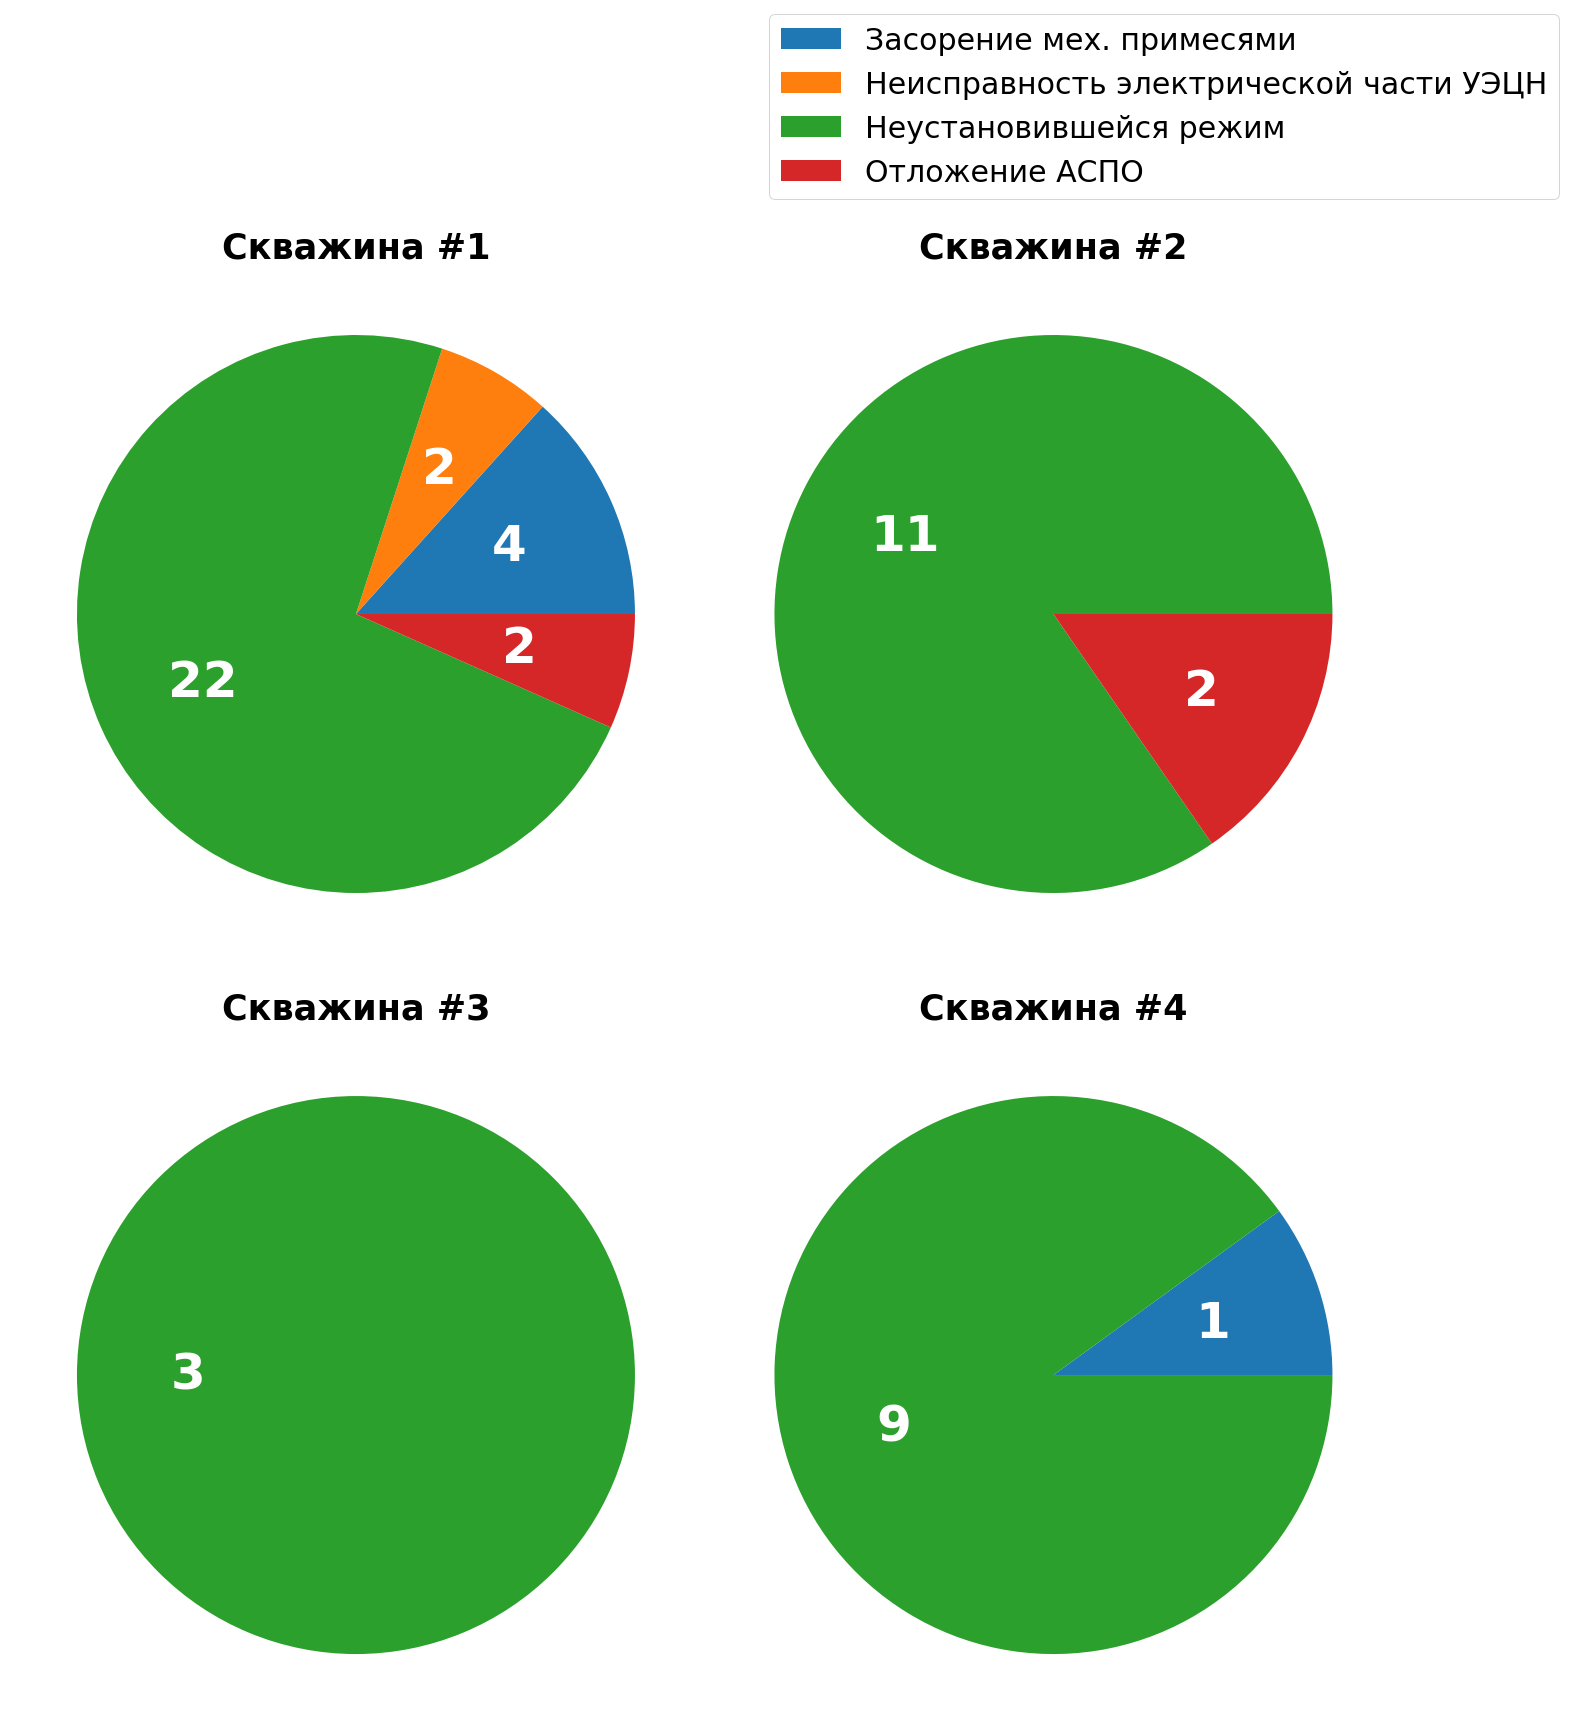

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 28))
cnt = 0

for axs in axes:
    for ax in axs:
        well = wells[cnt]
        tmp = events_by_wells[events_by_wells["well_id"] == well]
        labels_tmp = tmp["event"].unique()
        values = tmp["count"]
        ax.pie(
            tmp["count"], colors=[colors_dict[c] for c in labels_tmp]
            , autopct=lambda x: '{:.0f}'.format(x*values.sum()/100), textprops={'fontsize': 50, "color": "w", "fontweight": "bold"}
            );
        ax.set_title(f"Скважина #{cnt+1}", {"size": 35, "fontweight": "bold"})
        cnt += 1

handles, _ = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels=events, loc="upper right", fontsize=30)
plt.subplots_adjust(wspace=0, hspace=0)
# plt.show()

In [30]:
vals = events_by_wells.groupby("event")["count"].sum().values

C:\Users\vladv\AppData\Local\Temp/ipykernel_24016/1632591140.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, labels=events, loc="center right", fontsize=30)


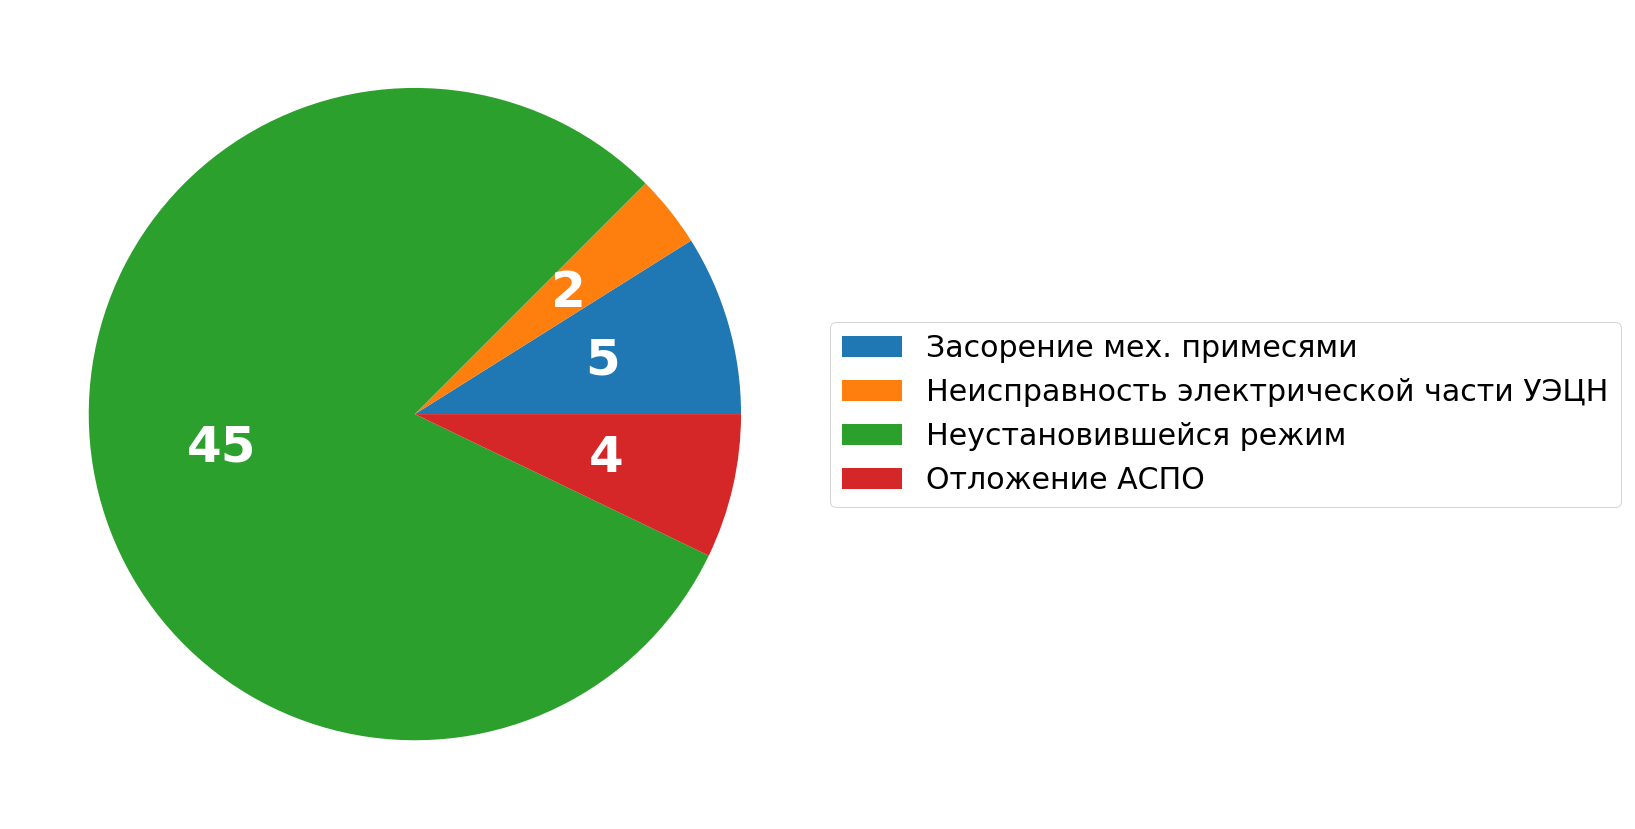

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35, 15))

plt.pie(
    events_by_wells.groupby("event")["count"].sum(), 
    # labels=events, 
    autopct=lambda x: '{:.0f}'.format(x*vals.sum()/100), 
    textprops={'fontsize': 50, "fontweight": "bold", "color": "w"});

handles, _ = ax.get_legend_handles_labels()
fig.legend(handles, labels=events, loc="center right", fontsize=30)

In [233]:
plt.figure(figsize=(15, 15))
plt.pie(events_by_wells["count"], labels=events["event"])
plt.legend()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1080x1080 with 0 Axes>

In [ ]:
wells_to_analyze = [1, 4, 7, 8]

In [ ]:
summary = get_data_summary(PATH+"4")

Skipping file curvature.csv
Skipping file dailyLosses.csv
Skipping file data_summary.csv
Skipping file eventsData1.csv
Skipping file eventsData2.csv
Skipping file full_data.csv
Skipping file full_data_events.csv
Skipping file joined_data.csv
Skipping file measurments.csv
Skipping file rulesCheck.csv
Skipping file test_file.csv
Skipping file VSP.csv


In [ ]:
data = pd.read_csv(PATH+"1\\full_data_events.csv", parse_dates=["time"])
data = data.set_index("time")

In [ ]:
all_events = get_events_summary(PATH)
events_needed = all_events[all_events["well_id"] == 1]

c:\Users\vladv\predictiveAnalytics\scripts\data_vizualization.py:147: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


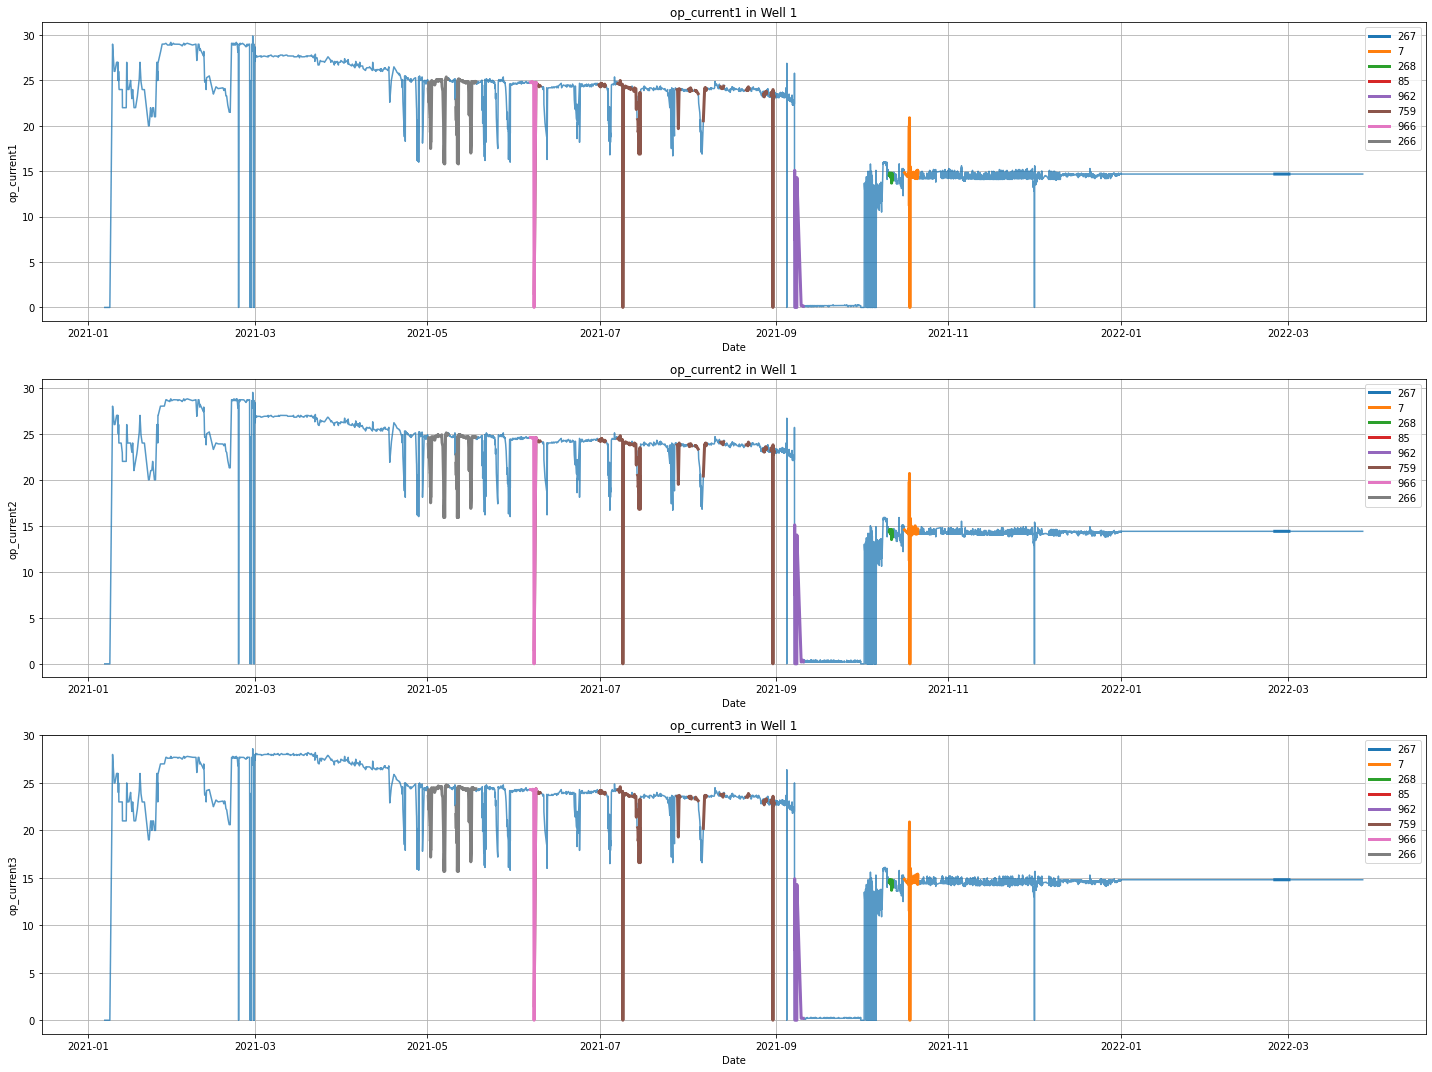

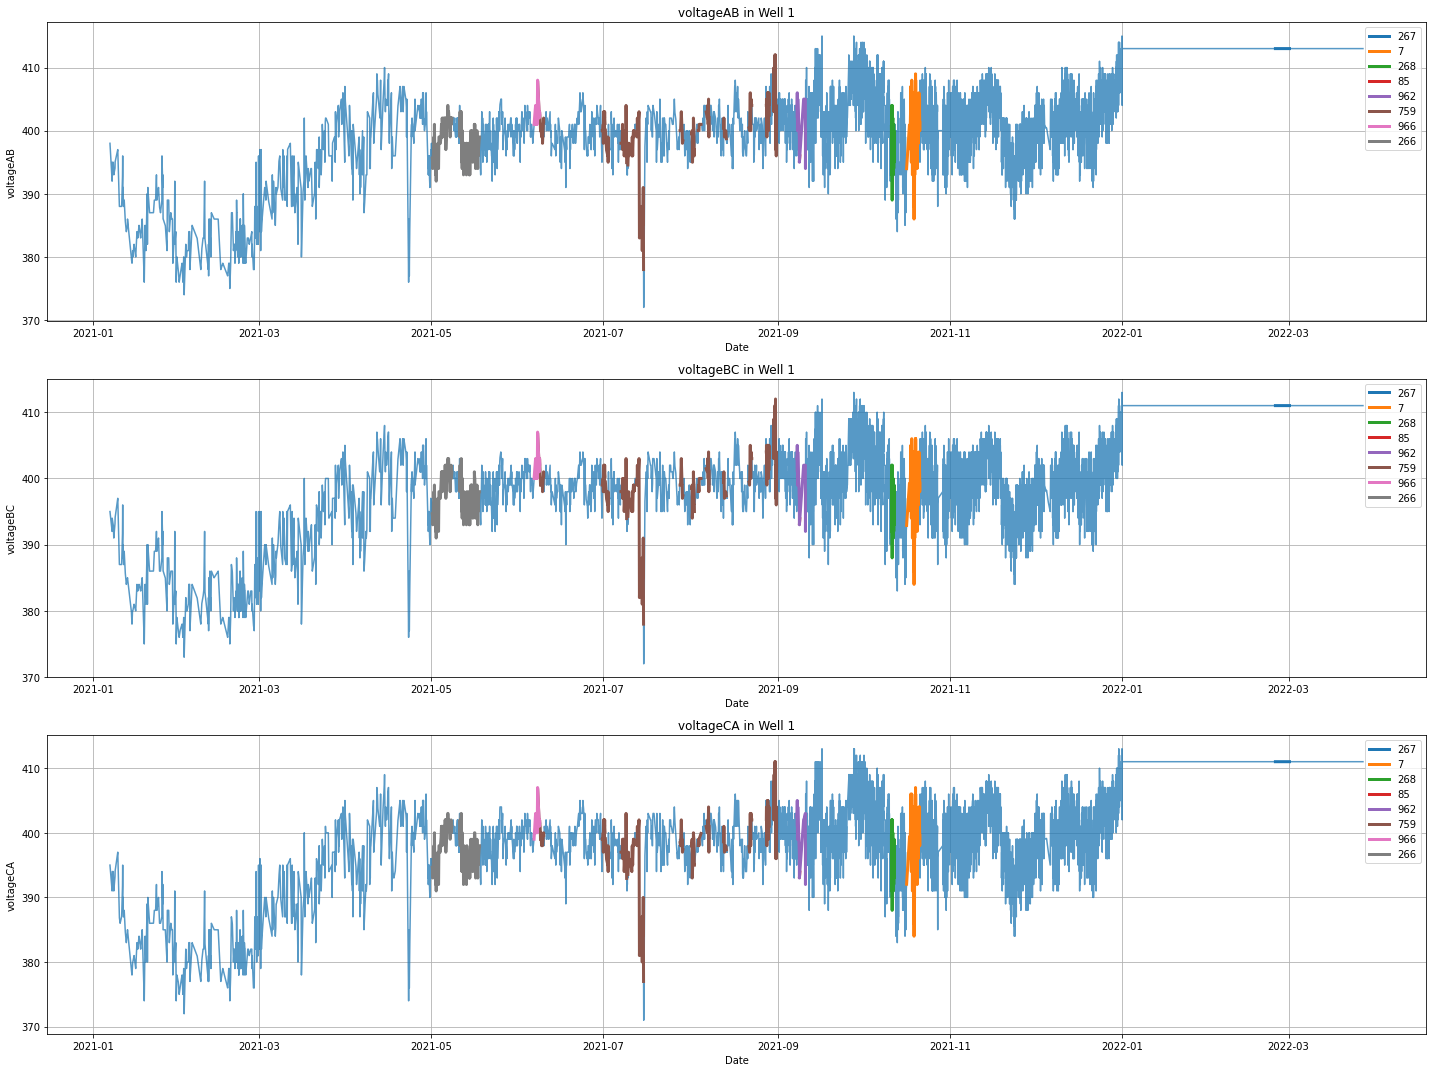

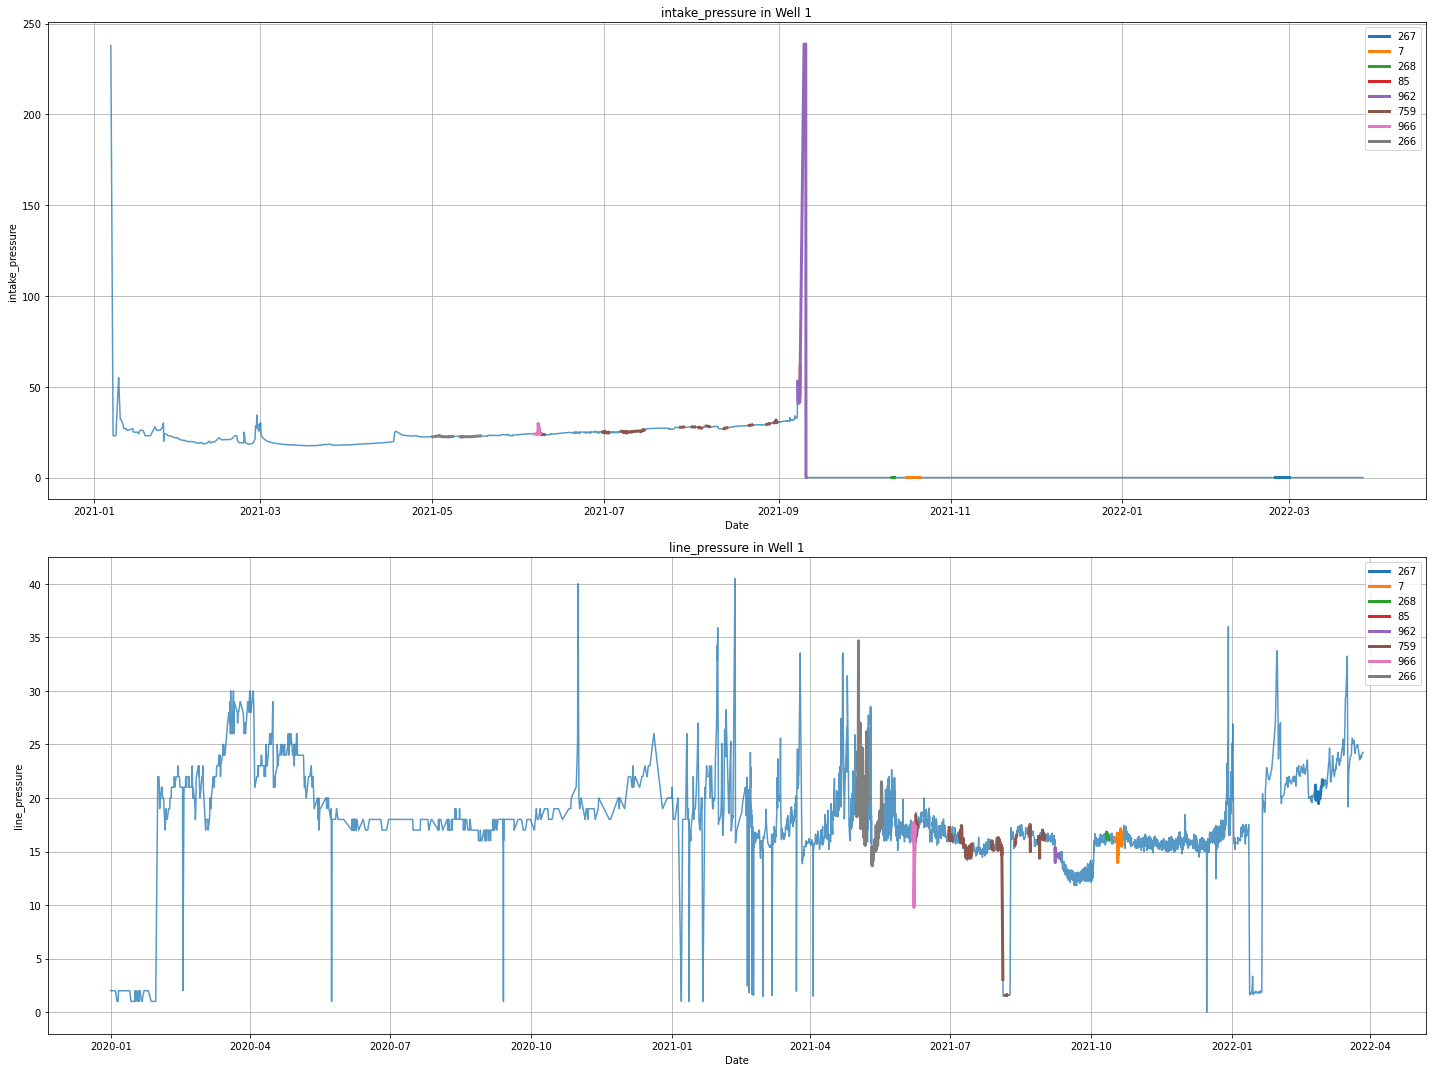

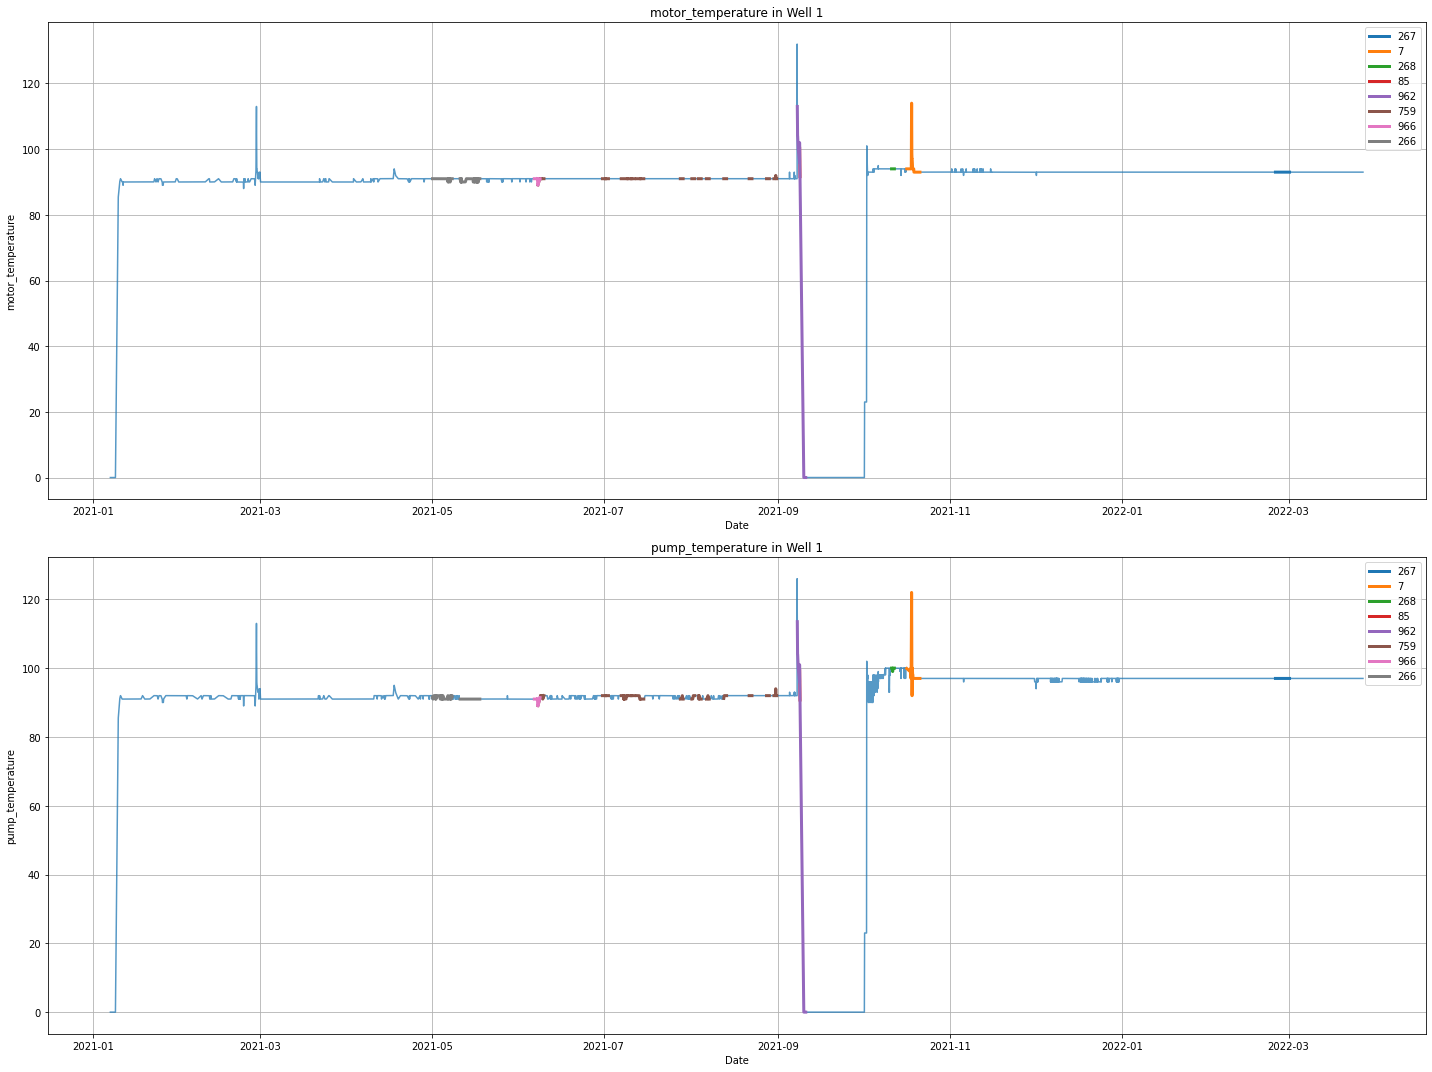

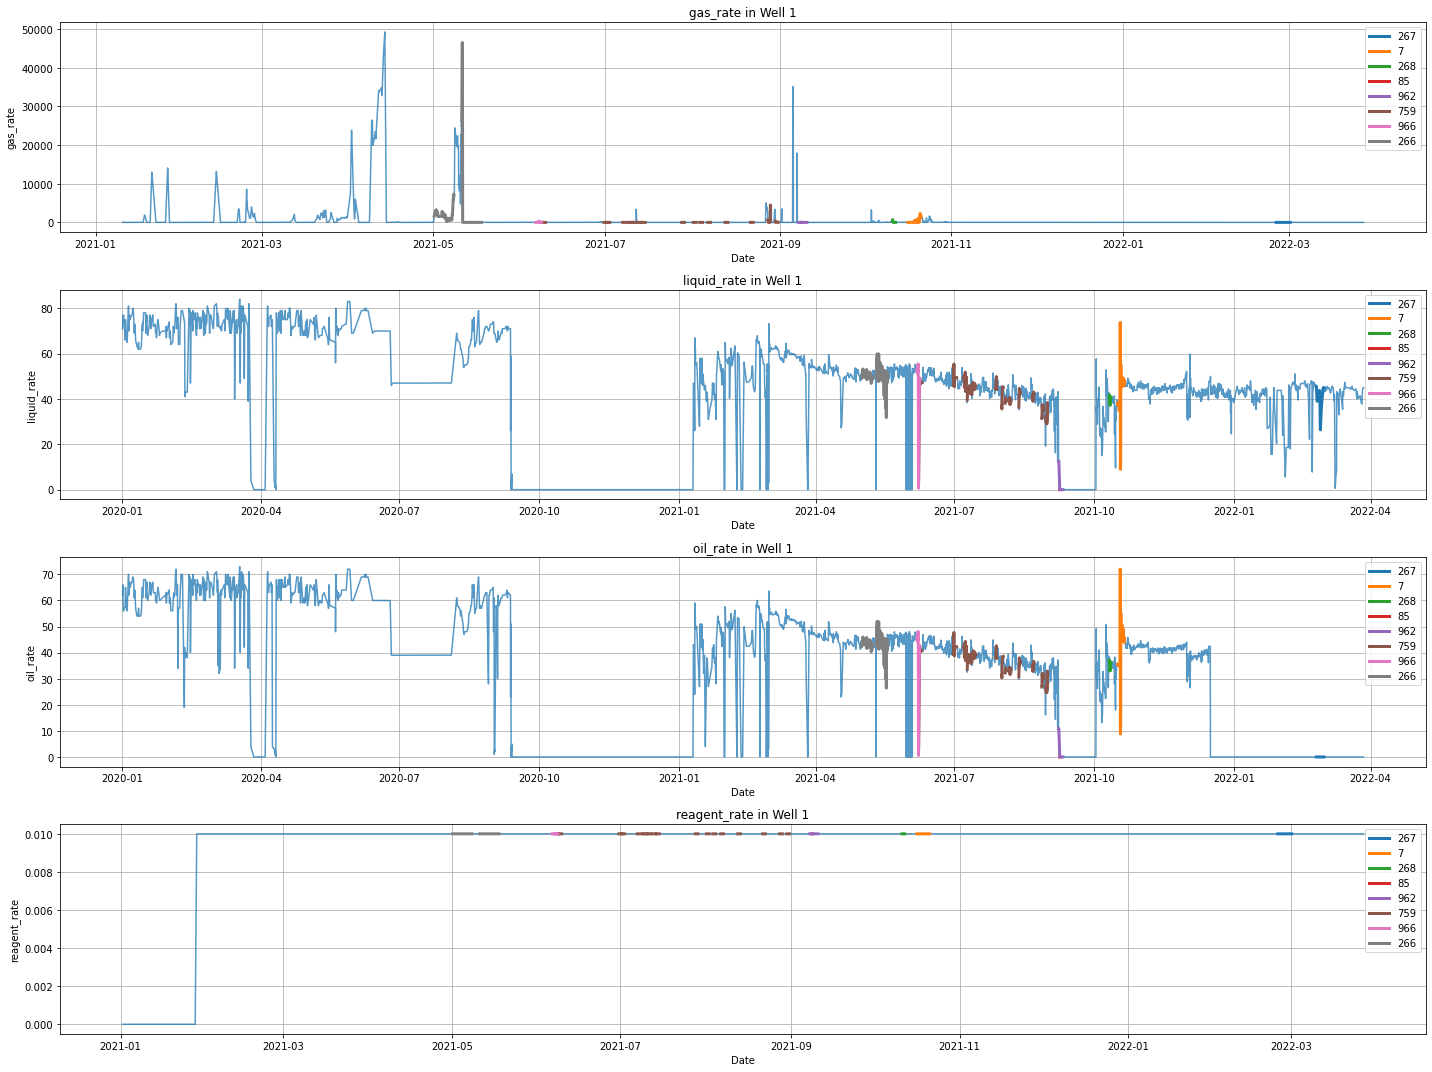

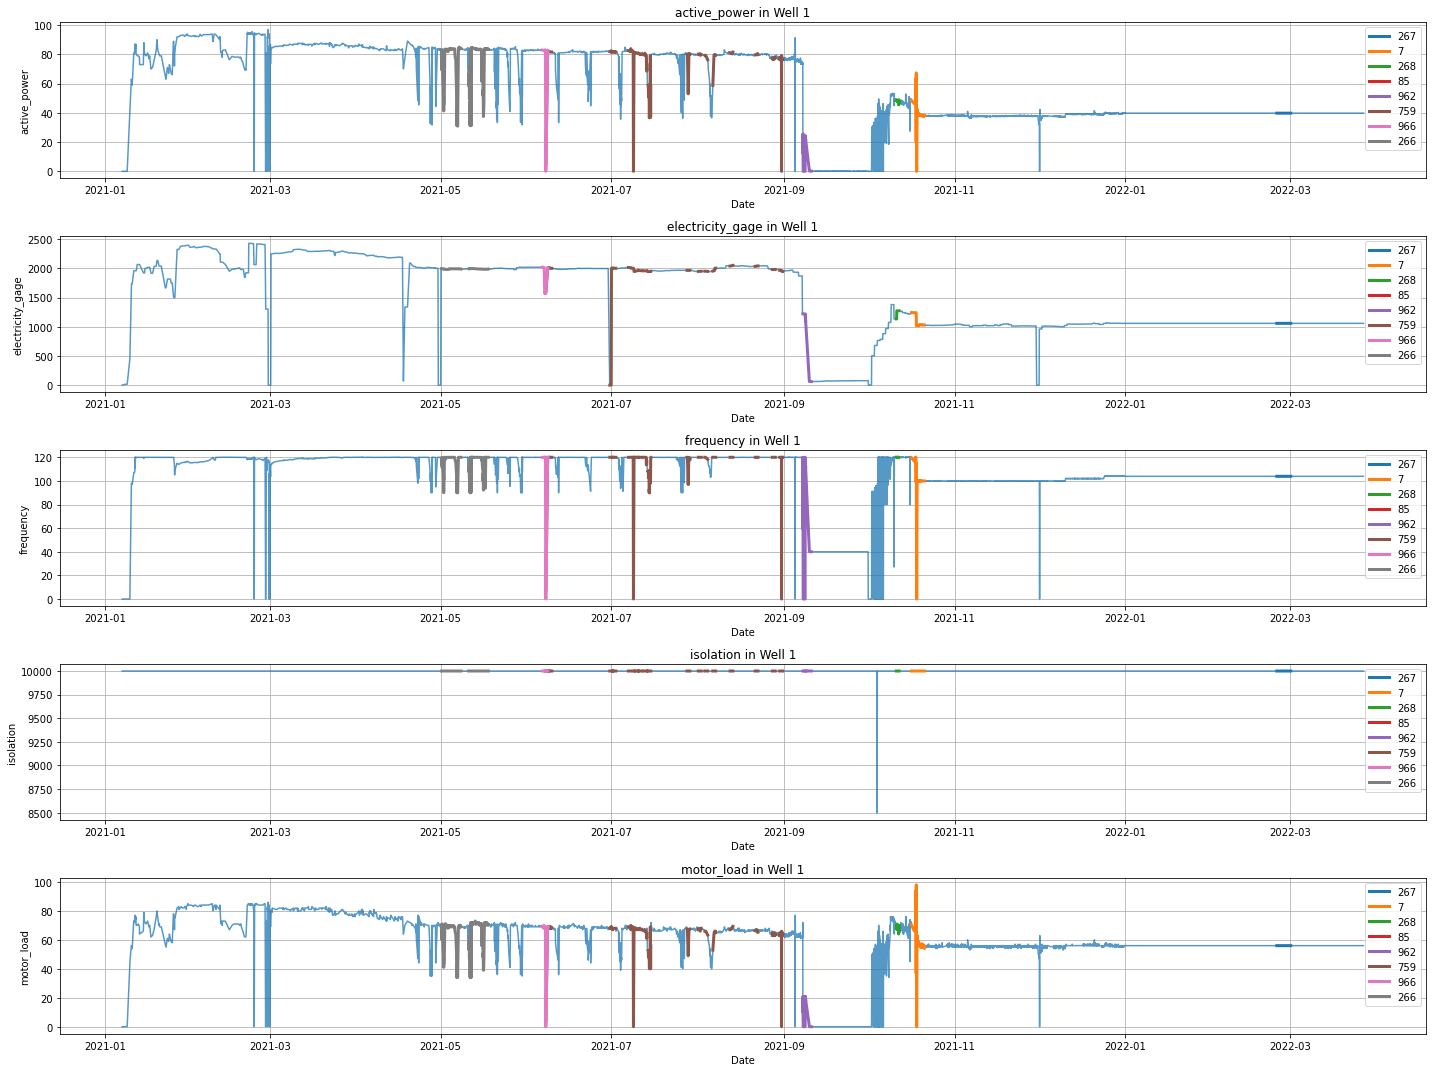

In [ ]:
metrics_plotting_with_events(data, events_needed)

In [ ]:
data1 = data.dropna()

In [ ]:
data1.head()

,active_power,electricity_gage,frequency,gas_rate,intake_pressure,isolation,line_pressure,liquid_rate,motor_load,motor_temperature,...,op_current1,op_current2,op_current3,pump_temperature,reagent_rate,voltageAB,voltageBC,voltageCA,well,event_id
time,,,,,,,,,,,,,,,,,,,,,
2021-01-10 14:10:00,59.000000,1735.000000,97.000000,0.0,32.000000,9999.0,26.000000,47.000000,54.000000,91.000000,...,26.000000,26.000000,25.000000,92.000000,0.0,388.0,387.0,386.000000,1,0
2021-01-10 14:12:00,59.056122,1735.571429,97.025510,0.0,31.994898,9999.0,25.979592,46.992347,54.048469,90.997449,...,26.002551,26.002551,25.002551,91.997449,0.0,388.0,387.0,386.002551,1,0
2021-01-10 14:14:00,59.112245,1736.142857,97.051020,0.0,31.989796,9999.0,25.959184,46.984694,54.096939,90.994898,...,26.005102,26.005102,25.005102,91.994898,0.0,388.0,387.0,386.005102,1,0
2021-01-10 14:16:00,59.168367,1736.714286,97.076531,0.0,31.984694,9999.0,25.938776,46.977041,54.145408,90.992347,...,26.007653,26.007653,25.007653,91.992347,0.0,388.0,387.0,386.007653,1,0
2021-01-10 14:18:00,59.224490,1737.285714,97.102041,0.0,31.979592,9999.0,25.918367,46.969388,54.193878,90.989796,...,26.010204,26.010204,25.010204,91.989796,0.0,388.0,387.0,386.010204,1,0


In [ ]:
data1["op_current1_fft"] = np.fft.fft(data1["op_current1"])

C:\Users\vladv\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\vladv\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


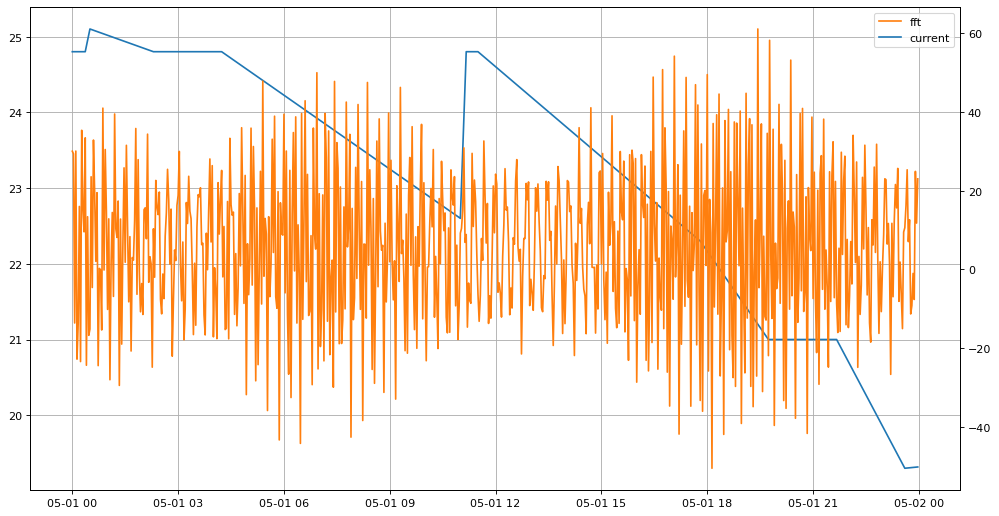

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 8), dpi=80)
ax2 = ax1.twinx()
lns2 = ax1.plot(data1.loc[data1.index.to_series().dt.date == pd.Timestamp("2021-05-01"), "op_current1"], color="tab:blue", label="current")
lns1 = ax2.plot(data1.loc[data1.index.to_series().dt.date == pd.Timestamp("2021-05-01"), "op_current1_fft"], color='tab:orange', label="fft")
# ax1.set_xlabel('Дата')
# ax1.set_ylabel('Добыча нефти, $м^3$')
# ax2.set_ylabel('Добыча воды, $м^3$')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')

In [ ]:
events = get_events_summary(PATH)

In [ ]:
events = get_events_summary(PATH, plot=True)

NameError: name 'get_events_summary' is not defined

In [ ]:
events.shape

(55, 22)

In [ ]:
events["losses"].sum()

1244.0

In [267]:
x = np.linspace(1, 100, 1000)
a = np.sin(x/2)
a += np.random.normal(size=len(a))

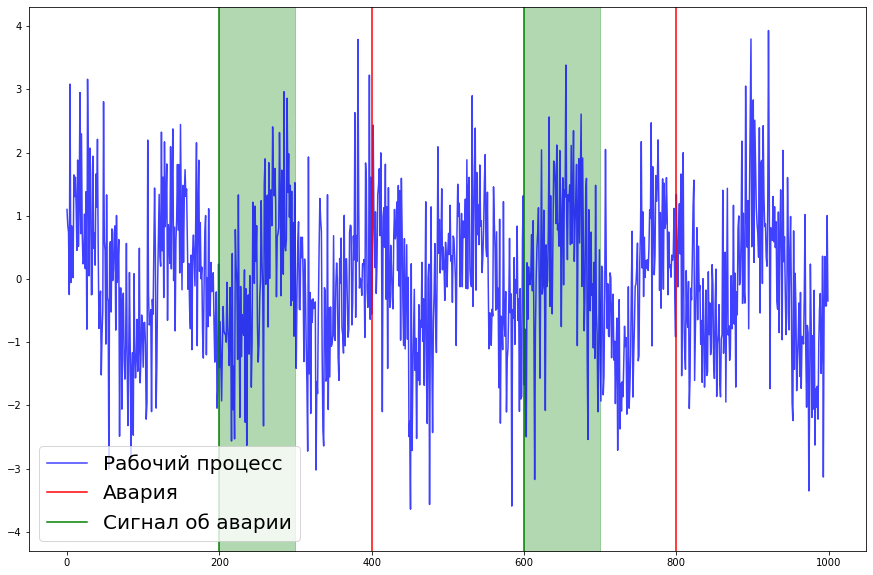

In [292]:
plt.figure(figsize=(15, 10))
plt.plot(a, label="Рабочий процесс", c="b", alpha=0.75)
plt.axvline(800, c="r", label="Авария")
plt.axvline(600, c="g", label="Сигнал об аварии")
plt.axvline(400, c="r")
plt.axvline(200, c="g")
plt.fill_between([200, 300], 4.5, -4.5, alpha=0.3, color="g")
plt.fill_between([600, 700], 4.5, -4.5, alpha=0.3, color="g")
plt.ylim(-4.3, 4.3)
plt.legend(fontsize=20)

In [40]:
import numpy as np

In [7]:
def permutations(string):
    string = list(string)
    string_len = len(string)
    unique_chars = set(string)
    chars_count = {}
    
    for char in unique_chars:
        chars_count[char] = string.count(char)
    ans = []
    perms = np.math.factorial(string_len) / (np.math.factorial(len(unique_chars)) * np.math.factorial(string_len - len(unique_chars)))
    
    while perms > len(ans):
        for i in range(string_len):
            count_copy = chars_count.copy()
    
        

    return chars_count

In [3]:
a = "Insert 200"

In [4]:
a.split()

['Insert', '200']

In [5]:
1//2

0

In [8]:
a = [1, 2, 3, 45]

In [7]:
len(a)

0

In [11]:
a.index(max(a))

3

In [13]:
a[0:2]

[1, 2]

In [21]:
def bin_search(lst, k):
    left = 0
    right = len(lst)
    
    while left <= right:
        mid = (left + right) // 2 - 1
        val = lst[mid]
        
        if val == mid:
            return mid + 1
        elif val < k:
            left = mid + 1
        else:
            right = mid - 1
    return -1
    
def main():
    lst = [1, 5, 8, 12, 13]
    nums = [8, 1, 23, 1, 11]
    ans = []
    for i in nums:
        ans.append(bin_search(lst, i))
    print(lst)
    print(nums)
    print(*ans)

In [22]:
main()

KeyboardInterrupt: 

In [23]:
lst = [1, 5, 8, 12, 13]

In [25]:
lst[len(lst)-1]

13